In [ ]:
import pandas as pd

# Load the PRN file
df = pd.read_csv(r'/content/drive/MyDrive/Hackathon/Hackout 24/SupplementaryData/Cassini/2000-2001_JupiterFlyby_BPHI.prn', delim_whitespace=True, header=None)

# Display the first few rows to understand the structure
print(df.head())


          0       1
0      T(s)    BPHI
1       0.0   0.389
2    6000.0   0.376
3  103620.0   0.314
4  109680.0  -0.702


In [ ]:
import pandas as pd

# Load the PRN file
df = pd.read_csv(r'/content/drive/MyDrive/Hackathon/Hackout 24/SupplementaryData/Juno/2016Btot.prn', delim_whitespace=True, header=None)

# Display the first few rows to understand the structure
print(df.head())


              0       1
0          T(s)  Btotal
1  3677263890.0   9.976
2  3677269890.0   9.426
3  3677275891.0   8.371
4  3677281891.0   8.362


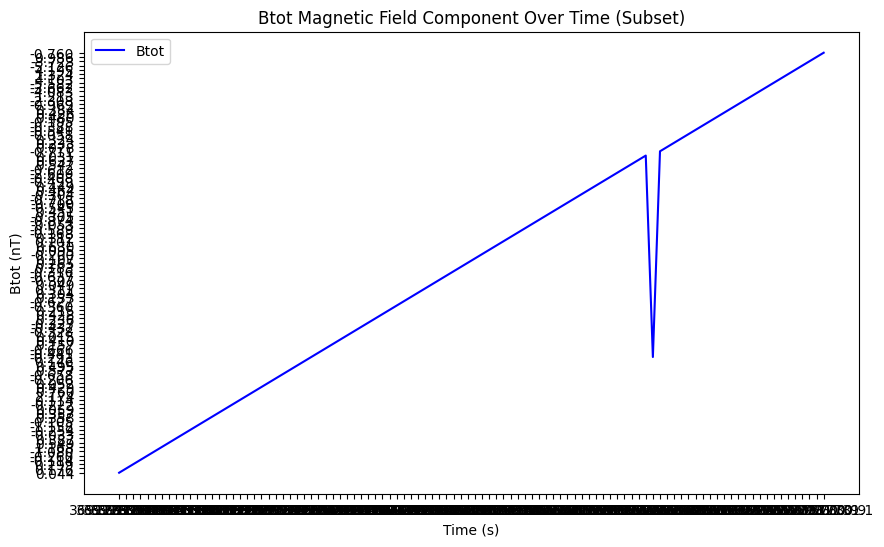

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the PRN file
df = pd.read_csv(r'/content/drive/MyDrive/Hackathon/Hackout 24/SupplementaryData/Juno/2016BPHI.prn', delim_whitespace=True, header=None)

# Assuming the first column is time (T) and the second is the Btot component
df.columns = ['Time', 'Btot']

# Select a subset of the data (e.g., the first 1000 rows)
subset_df = df.tail(100)  # Adjust the number of rows as needed

# Plot the subset of the data
plt.figure(figsize=(10, 6))
plt.plot(subset_df['Time'], subset_df['Btot'], label='Btot', color='blue')

# Add labels and title
plt.xlabel('Time (s)')
plt.ylabel('Btot (nT)')
plt.title('Btot Magnetic Field Component Over Time (Subset)')
plt.legend()

# Display the plot
plt.show()


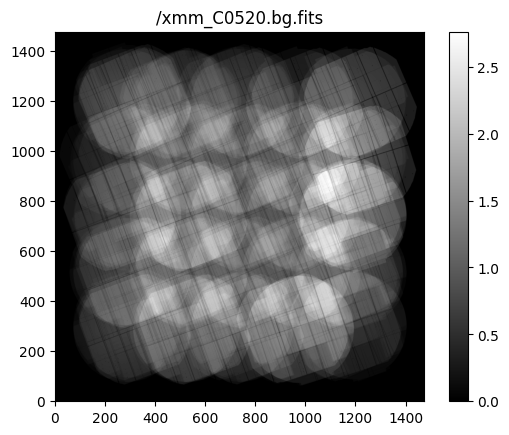

In [ ]:
import astropy.io.fits as fits
import matplotlib.pyplot as plt

def show_fits_image(fits_file):
  """Displays a FITS image using matplotlib.

  Args:
    fits_file: Path to the FITS file.
  """

  # Open the FITS file
  hdul = fits.open(fits_file)

  # Get the image data from the primary HDU
  image_data = hdul[0].data

  # Create a figure and display the image
  plt.figure()
  plt.imshow(image_data, cmap='gray', origin='lower')
  plt.colorbar()
  plt.title(fits_file)
  plt.show()

  # Close the FITS file
  hdul.close()

# Example usage:
fits_file = '/xmm_C0520.bg.fits'
show_fits_image(fits_file)


In [ ]:
import astropy.io.fits as fits

fits_file = '/content/hst_05240_1n_wfpc2_f218w_pc_drz.fits'

# Open the FITS file
hdul = fits.open(fits_file)

# Get information about the HDUs
hdul.info()

hdul.close()


Filename: /content/hst_05240_1n_wfpc2_f218w_pc_drz.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     253   ()      
  1  SCI           1 ImageHDU       110   (1000, 1000)   float32   
  2  WHT           1 ImageHDU       130   (1000, 1000)   float32   
  3  CTX           1 ImageHDU       129   (1000, 1000)   int32   


In [ ]:
from PIL import Image

# Open the TIF image
img = Image.open('your_image.tif')

# Display the image (optional)
img.show()


In [ ]:
pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 34.9 MB/s eta 0:00:00


# Star Galaxy Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import sys
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import glob
from tensorflow.keras.utils import image_dataset_from_directory
import os

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
galaxy_loc = glob.glob('/content/drive/MyDrive/Hackout24/Cutout Files/galaxy/*')

In [10]:
galaxy_loc

['/content/drive/MyDrive/Hackout24/Cutout Files/galaxy/IC745_H01_412_1000_3.jpg',
 '/content/drive/MyDrive/Hackout24/Cutout Files/galaxy/IC745_H01_1014_1208_3.jpg',
 '/content/drive/MyDrive/Hackout24/Cutout Files/galaxy/IC745_H01_734_168_3.jpg',
 '/content/drive/MyDrive/Hackout24/Cutout Files/galaxy/IC745_H01_1372_890_3.jpg',
 '/content/drive/MyDrive/Hackout24/Cutout Files/galaxy/IC745_H01_1821_1270_3.jpg',
 '/content/drive/MyDrive/Hackout24/Cutout Files/galaxy/IC3521-H01_1361_946_3.jpg',
 '/content/drive/MyDrive/Hackout24/Cutout Files/galaxy/IC3521-H01_1399_1031_3.jpg',
 '/content/drive/MyDrive/Hackout24/Cutout Files/galaxy/IC3521-H01_1260_751_3.jpg',
 '/content/drive/MyDrive/Hackout24/Cutout Files/galaxy/IC745_H01_904_1708_3.jpg',
 '/content/drive/MyDrive/Hackout24/Cutout Files/galaxy/IC3521-H01_1449_1243_3.jpg',
 '/content/drive/MyDrive/Hackout24/Cutout Files/galaxy/J121929p47152_001_010_1003_1275_3.jpg',
 '/content/drive/MyDrive/Hackout24/Cutout Files/galaxy/IC745_H01_1519_1266_3.j

In [11]:
star_loc = glob.glob('/content/drive/MyDrive/Hackout24/Cutout Files/star/*')

In [12]:
star_loc

['/content/drive/MyDrive/Hackout24/Cutout Files/star/NGC3381-H01_1616_1725_6.jpg',
 '/content/drive/MyDrive/Hackout24/Cutout Files/star/NGC5147_H01_1288_1277_6.jpg',
 '/content/drive/MyDrive/Hackout24/Cutout Files/star/NGC5147_H01_1309_1049_6.jpg',
 '/content/drive/MyDrive/Hackout24/Cutout Files/star/NGC5147_H01_1091_626_6.jpg',
 '/content/drive/MyDrive/Hackout24/Cutout Files/star/NGC3381-H01_452_544_6.jpg',
 '/content/drive/MyDrive/Hackout24/Cutout Files/star/NGC5147_H01_1301_297_6.jpg',
 '/content/drive/MyDrive/Hackout24/Cutout Files/star/NGC5147_H01_1235_159_6.jpg',
 '/content/drive/MyDrive/Hackout24/Cutout Files/star/NGC3381-H01_764_999_6.jpg',
 '/content/drive/MyDrive/Hackout24/Cutout Files/star/NGC3381-H01_38_1246_6.jpg',
 '/content/drive/MyDrive/Hackout24/Cutout Files/star/NGC3381-H01_1709_1142_6.jpg',
 '/content/drive/MyDrive/Hackout24/Cutout Files/star/NGC5147_H01_1343_966_6.jpg',
 '/content/drive/MyDrive/Hackout24/Cutout Files/star/NGC5147_H01_638_1279_6.jpg',
 '/content/driv

In [13]:
data = []
labels = []

In [14]:
for i in galaxy_loc:
  img = cv2.imread(i,1)
  img = np.array(img)
  data.append(img)
  labels.append(0)
for i in star_loc:
  img = cv2.imread(i,1)
  img = np.array(img)
  data.append(img)
  labels.append(1)

In [15]:
data, labels= np.array(data), np.array(labels)

In [16]:
dataset= pd.DataFrame(list(zip(data, labels)), columns=['images','labels'])

In [17]:
dataset

,images,labels
0,"[[[87, 87, 87], [66, 66, 66], [79, 79, 79], [1...",0
1,"[[[34, 34, 34], [39, 39, 39], [11, 11, 11], [3...",0
2,"[[[66, 66, 66], [69, 69, 69], [95, 95, 95], [8...",0
3,"[[[50, 50, 50], [115, 115, 115], [116, 116, 11...",0
4,"[[[64, 64, 64], [70, 70, 70], [51, 51, 51], [6...",0
...,...,...
3981,"[[[61, 61, 61], [120, 120, 120], [92, 92, 92],...",1
3982,"[[[106, 106, 106], [59, 59, 59], [44, 44, 44],...",1
3983,"[[[105, 105, 105], [53, 53, 53], [92, 92, 92],...",1
3984,"[[[144, 144, 144], [105, 105, 105], [96, 96, 9...",1


In [18]:
data

array([[[[ 87,  87,  87],
         [ 66,  66,  66],
         [ 79,  79,  79],
         ...,
         [104, 104, 104],
         [ 73,  73,  73],
         [ 88,  88,  88]],

        [[ 60,  60,  60],
         [ 57,  57,  57],
         [ 44,  44,  44],
         ...,
         [ 83,  83,  83],
         [ 92,  92,  92],
         [ 88,  88,  88]],

        [[ 79,  79,  79],
         [ 82,  82,  82],
         [105, 105, 105],
         ...,
         [143, 143, 143],
         [ 99,  99,  99],
         [ 61,  61,  61]],

        ...,

        [[ 68,  68,  68],
         [ 12,  12,  12],
         [ 83,  83,  83],
         ...,
         [ 45,  45,  45],
         [103, 103, 103],
         [ 79,  79,  79]],

        [[ 87,  87,  87],
         [ 24,  24,  24],
         [ 74,  74,  74],
         ...,
         [ 62,  62,  62],
         [ 72,  72,  72],
         [ 85,  85,  85]],

        [[ 37,  37,  37],
         [ 59,  59,  59],
         [ 53,  53,  53],
         ...,
         [131, 131, 131],
        

In [19]:
labels

array([0, 0, 0, ..., 1, 1, 1])

In [20]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2,
                                                random_state=42, shuffle=True,stratify=dataset['labels'].values)

In [21]:
x_train.shape

(3188, 64, 64, 3)

In [22]:
x_test.shape

(798, 64, 64, 3)

In [23]:
x_train = x_train/255
x_test = x_test/255

In [24]:
y_train.shape

(3188,)

In [28]:
x_train = x_train.reshape(x_train.shape[0],*(64,64,3))
x_test = x_test.reshape(x_test.shape[0],*(64,64,3))

In [29]:
from tensorflow.keras import datasets, layers, models

cnn = models.Sequential()

# adding convolutional layer
cnn.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (64,64,3))) #32 is number of filters
#input layer need to be specified in first layer only... rest will understand the size of data automatically

# adding pooling layer
cnn.add(layers.MaxPooling2D(2,2)) # 2X2 is size of pooling matrix

cnn.add(layers.Conv2D(64, (3,3), activation = 'relu')) #64 is number of filters
cnn.add(layers.MaxPooling2D(2,2))

cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))

cnn.add(layers.Flatten())   # flattening the feature map - refer theory notes

cnn.add(layers.Dense(64, activation = 'relu')) #here 64 neurons

cnn.add(layers.Dense(10, activation = 'softmax')) #10 neurons #softmax is like probability function which tells out of which class the image belongs to
cnn.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         589,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 646,858 (2.47 MB)

 Trainable params: 646,858 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
cnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [31]:
epochs = 25

history = cnn.fit(x_train, y_train, epochs = epochs, validation_data = (x_test, y_test), verbose=2)

Epoch 1/25
100/100 - 27s - 272ms/step - accuracy: 0.7428 - loss: 0.6206 - val_accuracy: 0.7632 - val_loss: 0.5210
Epoch 2/25
100/100 - 37s - 370ms/step - accuracy: 0.7654 - loss: 0.4765 - val_accuracy: 0.7769 - val_loss: 0.4697
Epoch 3/25
100/100 - 41s - 406ms/step - accuracy: 0.8262 - loss: 0.3863 - val_accuracy: 0.8258 - val_loss: 0.3832
Epoch 4/25
100/100 - 41s - 407ms/step - accuracy: 0.8447 - loss: 0.3467 - val_accuracy: 0.8571 - val_loss: 0.3575
Epoch 5/25
100/100 - 41s - 412ms/step - accuracy: 0.8617 - loss: 0.3205 - val_accuracy: 0.8684 - val_loss: 0.3259
Epoch 6/25
100/100 - 41s - 414ms/step - accuracy: 0.8792 - loss: 0.2873 - val_accuracy: 0.8596 - val_loss: 0.3201
Epoch 7/25
100/100 - 22s - 216ms/step - accuracy: 0.8883 - loss: 0.2623 - val_accuracy: 0.8860 - val_loss: 0.3049
Epoch 8/25
100/100 - 41s - 407ms/step - accuracy: 0.9012 - loss: 0.2424 - val_accuracy: 0.8759 - val_loss: 0.3139
Epoch 9/25
100/100 - 41s - 411ms/step - accuracy: 0.9112 - loss: 0.2167 - val_accuracy: 

In [38]:
import pickle

# Assuming you have your trained model in a variable called 'model'
with open('model.pkl', 'wb') as f:
    pickle.dump(cnn, f)

print("Model saved successfully!")


Model saved successfully!


In [33]:
evaluation = cnn.evaluate(x_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.8959 - loss: 0.5933
Test Accuracy : 0.875


In [34]:
y_test

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,

In [35]:
x_test.shape

(798, 64, 64, 3)

In [36]:
x_test[0].shape

(64, 64, 3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


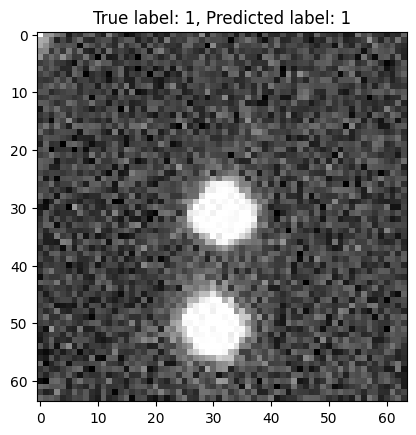

Correct prediction!


In [37]:
import random
random_index = random.randint(0, len(x_test) - 1)

# Step 2: Select the corresponding image and true label
random_image = x_test[random_index]
true_label = y_test[random_index]

# Step 3: Prepare the image for prediction by adding a batch dimension
image = np.expand_dims(random_image, axis=0)

# Step 4: Predict the class
predict_type = cnn.predict(image)
predicted_class = np.argmax(predict_type, axis=1)[0]  # Get the predicted class

# Step 5: Display the image along with true and predicted labels
plt.imshow(random_image)
plt.title(f"True label: {true_label}, Predicted label: {predicted_class}")
plt.show()

# Step 6: Check if the prediction is correct
if predicted_class == true_label:
    print("Correct prediction!")
else:
    print("Incorrect prediction.")

In [40]:
cnn.save("/content/model.keras")